# Anomly detection for IoT 

Preprocessed dataset for network based intrusion detection system in Iot Devices. 
Ultrasonic Sensor with Arduino and NodeMCU used to monitor the network and collect the network logs. 
NodeMCU with ESP8266 wifi module was used to send data to the server via wifi. 

For more detail, check [here](https://www.kaggle.com/datasets/speedwall10/iot-device-network-logs).


In [1]:
%matplotlib inline
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 22})


In [2]:
df = pl.read_csv('./IoT-DNL.csv')
df = df.sample(int(df.shape[0]*0.01))
df.head()

frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64
114477,130401699950756,98,189924305281355,167275820076079,1921680198,1921680121,1.0,84.0,0.0,0.0,0.0,-2.0,2
65609,125417821604408,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,63984.0,80.0,-99.0,0
39841,124701269826639,98,167275820076079,110425385261001,1921680121,1921680183,1.0,84.0,0.0,0.0,0.0,-2.0,2
46117,124851934513174,156,37559677479822,167275820076079,0,0,-1.0,0.0,0.0,0.0,0.0,-99.0,0
34806,124556253411302,169,110425385261001,167275820076079,1921680183,1921680121,6.0,155.0,103.0,53504.943621,80.0,-3.0,3


In [3]:
df.describe()

describe,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0,4774.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",52349.88982,1.2566e14,124.184541,1.2938e14,1.5907e14,8.4738e8,1.2140e9,2.968161,101.225089,64.348452,24271.413025,4777.577713,-1.643533,2.442815
"""std""",32650.589998,2.0882e12,89.369243,4.4549e13,4.9913e13,9.0625e8,3.5679e9,3.292474,98.136782,89.14897,27985.859806,15822.291851,122.506911,1.714598
"""min""",29.0,1.2372e14,42.0,3.7560e13,1.1011e12,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-99.0,0.0
"""25%""",26493.0,1.2432e14,42.0,8.7972e13,1.1043e14,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-5.0,1.0
"""50%""",45538.0,1.2485e14,98.0,1.1043e14,1.6728e14,1.92168035e8,1.9217e9,6.0,84.0,0.0,80.0,80.0,-3.0,2.0
"""75%""",76285.0,1.2564e14,176.0,1.6728e14,1.6728e14,1.9217e9,1.9217e9,6.0,162.0,110.0,55404.116762,80.0,-2.0,4.0
"""max""",125043.0,1.3051e14,288.0,2.0707e14,2.8147e14,1.9217e9,2.3926e11,17.0,274.0,234.0,65459.0,65531.0,2220.0,5.0


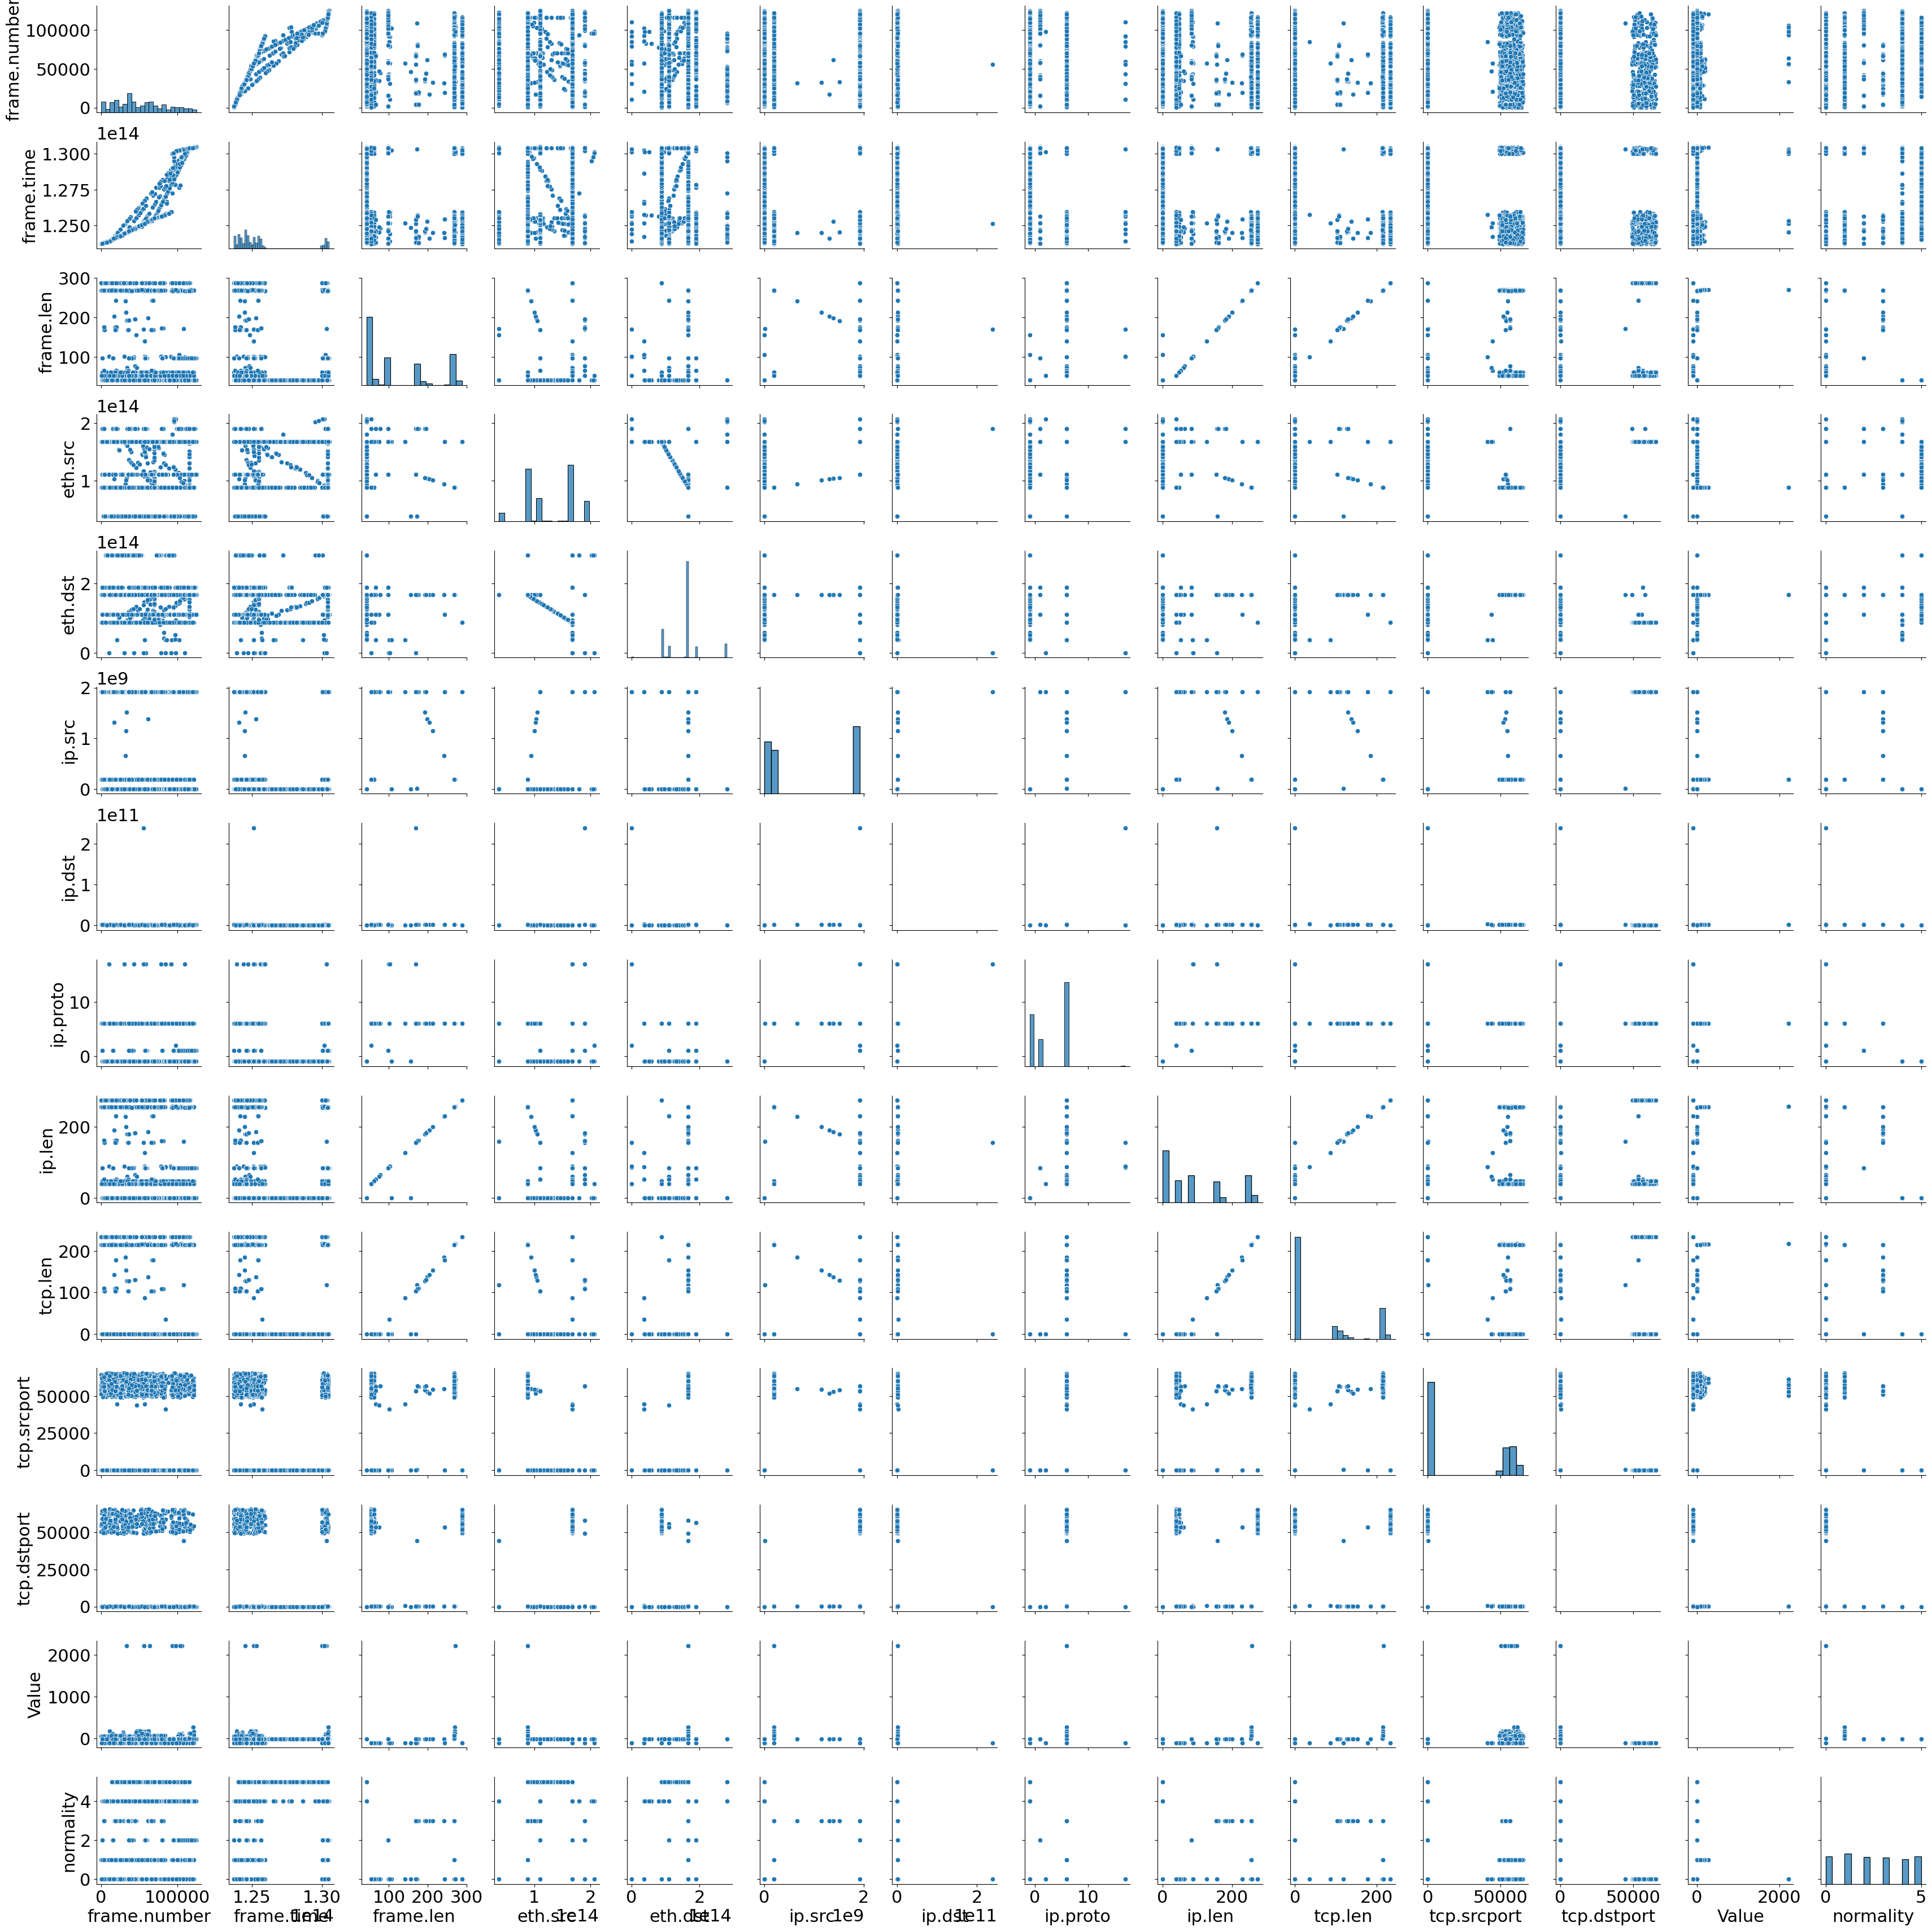

In [4]:
sns.pairplot(df.to_pandas())
plt.show()

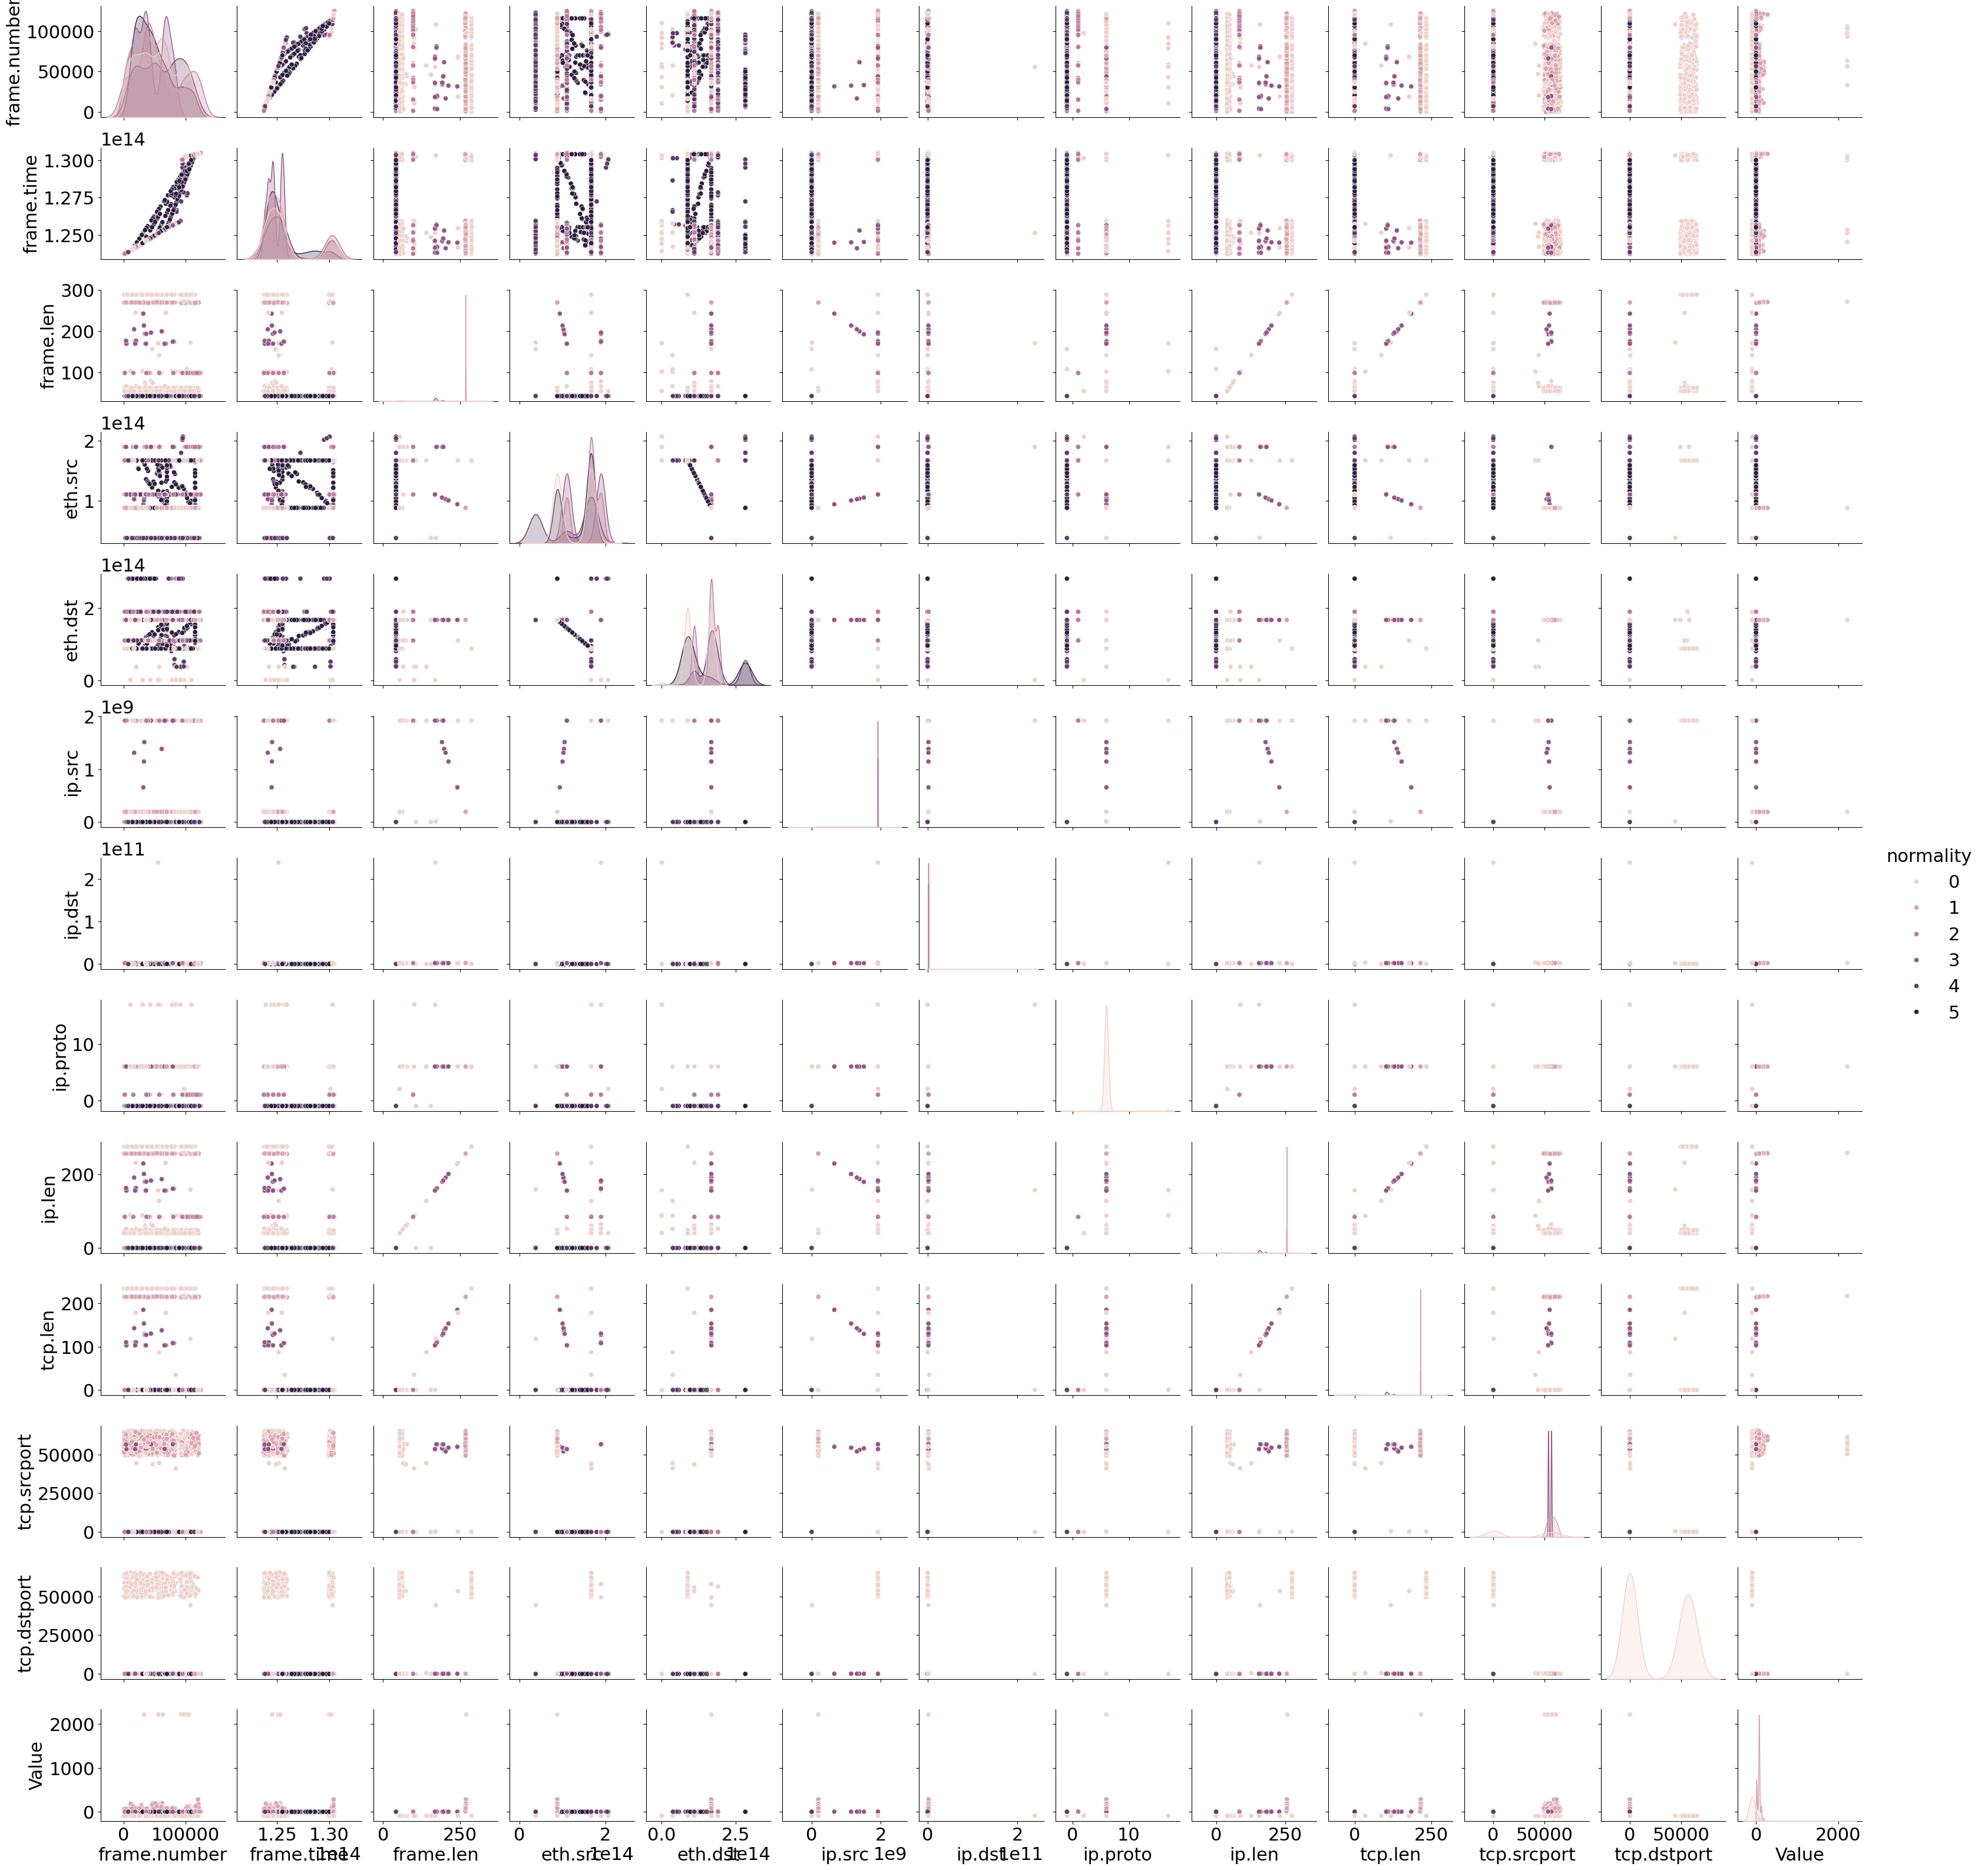

In [5]:
sns.pairplot(df.to_pandas(), hue='normality')
plt.show()

In [6]:
X = df.drop(['normality']).drop_nulls()
y = df[['normality']].drop_nulls()
print(f'{X.describe()}')
print(f'{y.describe()}')

shape: (9, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ describe  ┆ frame.num ┆ frame.tim ┆ frame.len ┆ … ┆ tcp.len   ┆ tcp.srcpo ┆ tcp.dstpo ┆ Value    │
│ ---       ┆ ber       ┆ e         ┆ ---       ┆   ┆ ---       ┆ rt        ┆ rt        ┆ ---      │
│ str       ┆ ---       ┆ ---       ┆ f64       ┆   ┆ f64       ┆ ---       ┆ ---       ┆ f64      │
│           ┆ f64       ┆ f64       ┆           ┆   ┆           ┆ f64       ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 4774.0    ┆ 4774.0    ┆ 4774.0    ┆ … ┆ 4774.0    ┆ 4774.0    ┆ 4774.0    ┆ 4774.0   │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ 52349.889 ┆ 1.2566e14 ┆ 124.18454 ┆ … ┆ 64.348452 ┆ 24271.413 